In [1]:
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import os
from os import listdir
from os.path import isfile, join
import cv2
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data_dir = "data"

train_dir = "data/train"

test_dir = "data/test"

In [3]:
# creating dataframe for train set

figures = os.listdir(train_dir)

categories = []

for fig in figures:
    category = fig.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)
        
df = pd.DataFrame({
    'fig': figures,
    'category': categories
})



In [4]:
# checking dataframe

df.head()

fig  category
0  dog.12142.jpg         1
1   dog.2357.jpg         1
2  dog.10008.jpg         1
3   cat.9020.jpg         0
4  cat.11109.jpg         0

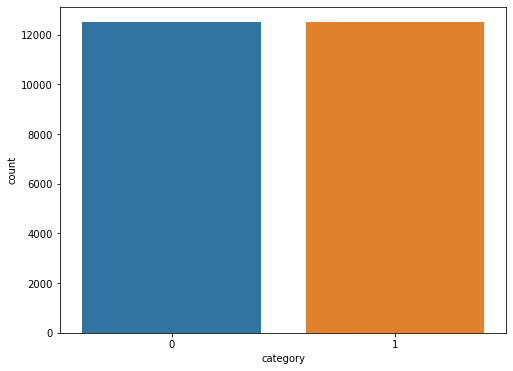

In [5]:
# ploting the dataframe
from matplotlib import pyplot
import seaborn as sns

pyplot.figure(figsize=(8,6))
sns.countplot(x='category',data=df)
pyplot.show()

In [8]:
# creating sub-directories for training and validation


subdirs = ['training/', 'validation/']

for subdir in subdirs:
    
    # create label subdirectories
    labeldirs = ['dogs/', 'cats/']
    
    for labldir in labeldirs:
        newdir = data_dir +'/'+ subdir + labldir
        os.makedirs(newdir, exist_ok=True)

In [6]:
os.listdir(data_dir)

['train', 'test', 'validation', 'training']

In [10]:
# Selecting randomly to hold back 25% of the images into the validation dataset

from random import random, seed
from shutil import copyfile

# seed random number generator
seed(1)

# define ratio of pictures to use for validation
val_ratio = 0.25

# copy training dataset images into subdirectories
src_directory = 'train/'

for file in os.listdir(data_dir +'/' + src_directory):
    src = data_dir + '/'+ src_directory + file
    dst_dir = data_dir +'/' + 'training/'
    if random() < val_ratio:
        dst_dir = data_dir +'/' + 'validation/'
    if file.startswith('cat'):
        dst =  dst_dir  + 'cats/'  + file
        copyfile(src, dst)
    elif file.startswith('dog'):
        dst =  dst_dir  + 'dogs/'  + file
        copyfile(src, dst)

In [7]:
print(os.listdir('data/training/cats')[0:5])
print(os.listdir('data/training/dogs')[0:5])
print(os.listdir('data/validation/cats')[0:5])
print(os.listdir('data/validation/dogs')[0:5])

['cat.9020.jpg', 'cat.11109.jpg', 'cat.8601.jpg', 'cat.9031.jpg', 'cat.354.jpg']
['dog.2357.jpg', 'dog.10008.jpg', 'dog.4614.jpg', 'dog.5254.jpg', 'dog.3700.jpg']
['cat.7981.jpg', 'cat.4583.jpg', 'cat.12312.jpg', 'cat.9329.jpg', 'cat.706.jpg']
['dog.12142.jpg', 'dog.304.jpg', 'dog.10184.jpg', 'dog.8192.jpg', 'dog.3082.jpg']


In [8]:
img_width = 256
img_height = 256

train_data_dir = 'data/training/'
validation_data_dir = 'data/validation/'
train_samples = 120
validation_samples = 100
epochs = 25
batch_size = 50

# Check for TensorFlow or Thieno
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [9]:

model = Sequential()
# Conv2D : Two dimenstional convulational model.
# 32 : Input for next layer
# (3,3) convulonational windows size
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) # Output convert into one dimension layer and will go to Dense layer
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [10]:
import keras
from keras import optimizers
model.compile(loss='binary_crossentropy', 
              optimizer=keras.optimizers.Adam(lr=.0001),
              metrics=['accuracy'])

Data Augmentation is a method of artificially creating a new dataset for training from the existing training dataset to improve the performance of deep learning neural network 
with the amount of data available. It is a form of regularization which makes our model generalize better than before.


In [11]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

this is the augmentation configuration we will use for testing:
only rescaling, avoiding having same training and validation data.

In [12]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [14]:

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 18697 images belonging to 2 classes.


In [15]:
print(train_generator.class_indices)

{'cats': 0, 'dogs': 1}


In [16]:
imgs, labels = next(train_generator)

In [17]:

from skimage import io

def imshow(image_RGB):
  io.imshow(image_RGB)
  io.show()

50
1.0


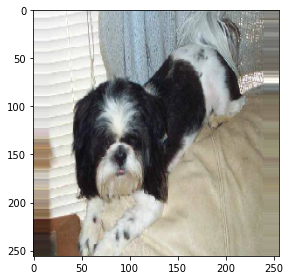

0.0


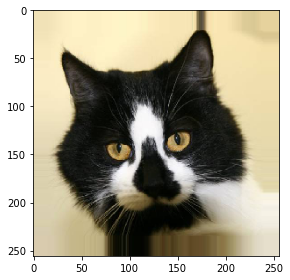

0.0


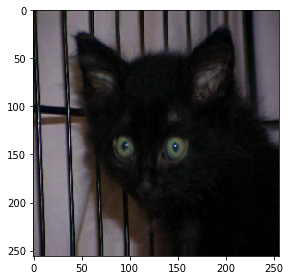

0.0


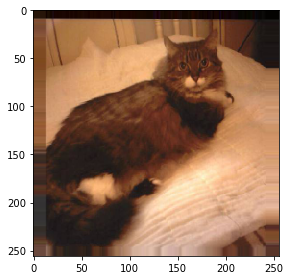

0.0


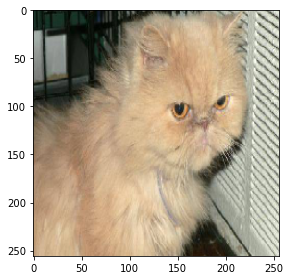

1.0


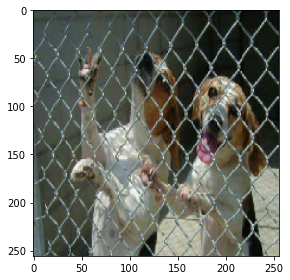

1.0


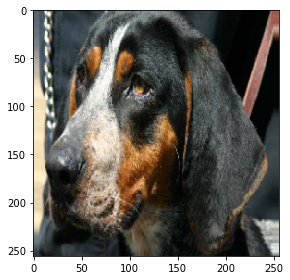

0.0


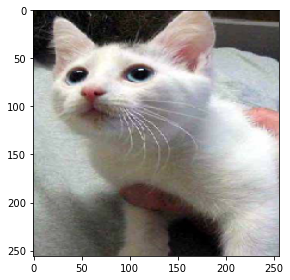

1.0


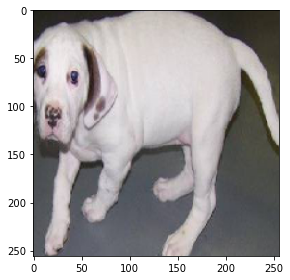

1.0


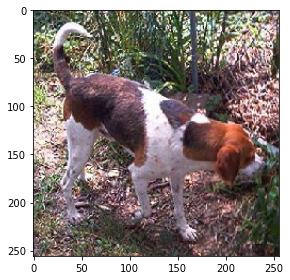

1.0


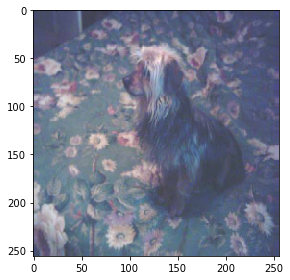

1.0


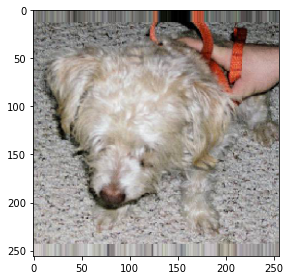

1.0


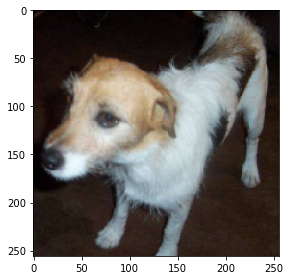

0.0


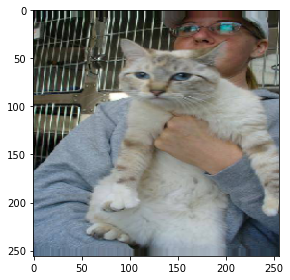

1.0


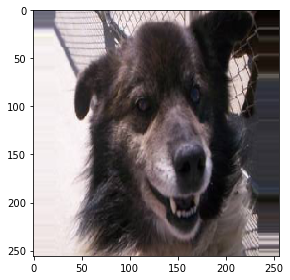

1.0


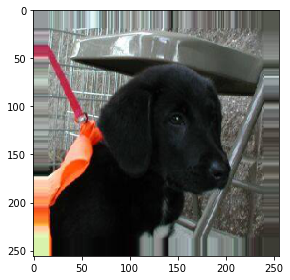

0.0


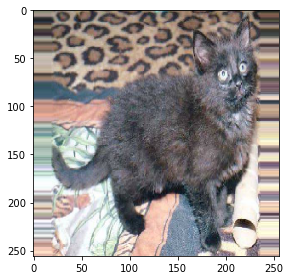

0.0


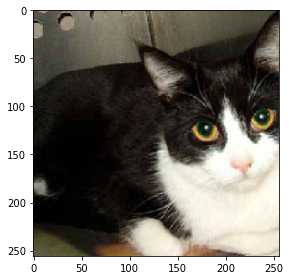

0.0


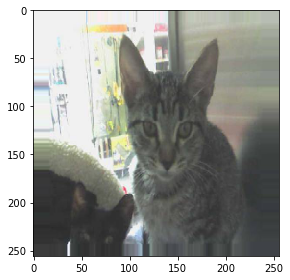

0.0


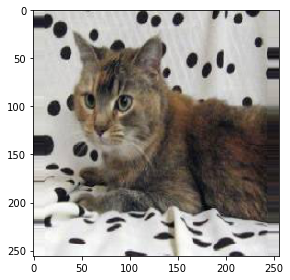

1.0


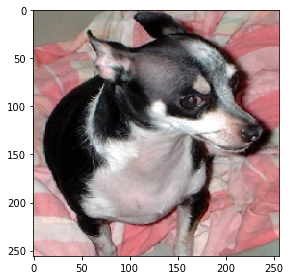

0.0


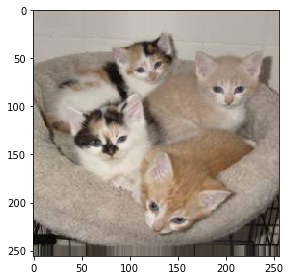

0.0


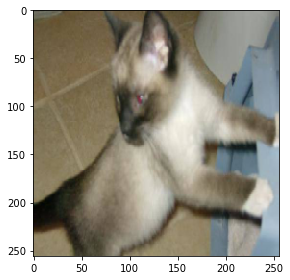

1.0


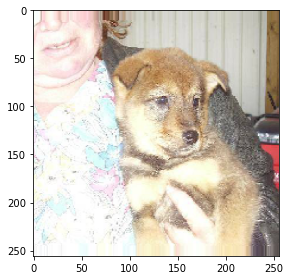

0.0


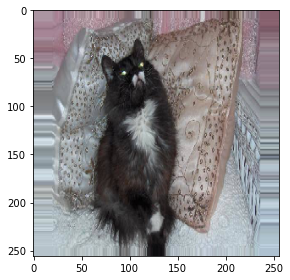

0.0


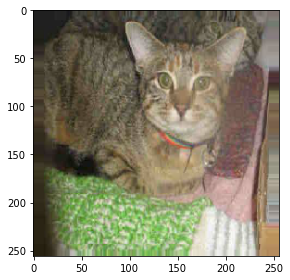

1.0


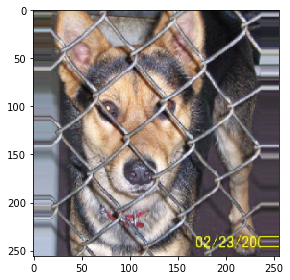

0.0


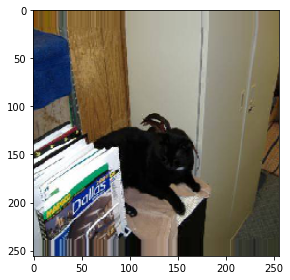

1.0


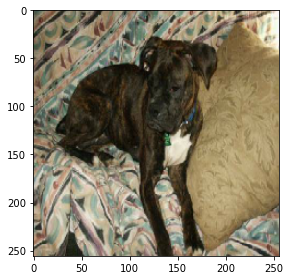

0.0


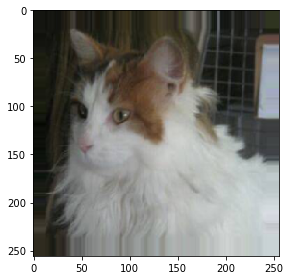

0.0


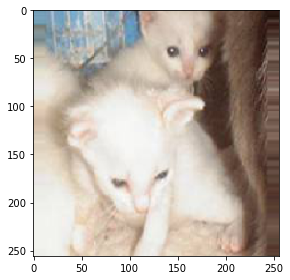

1.0


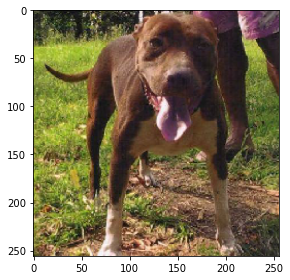

0.0


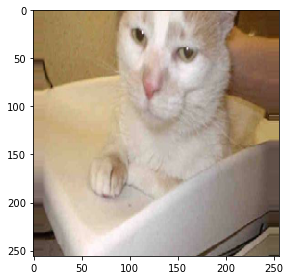

0.0


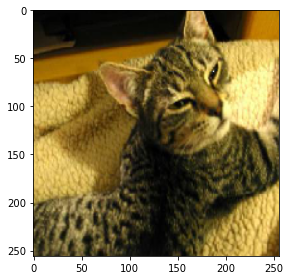

1.0


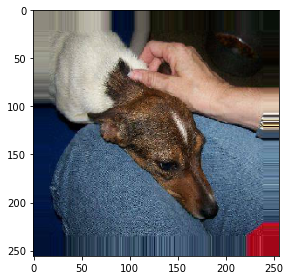

1.0


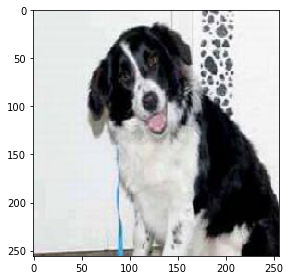

1.0


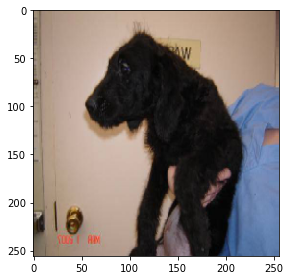

0.0


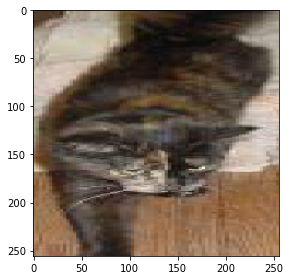

1.0


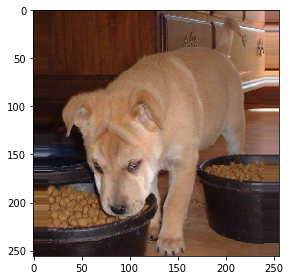

1.0


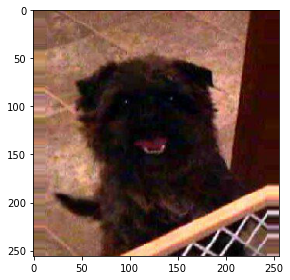

1.0


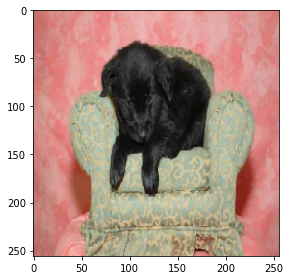

1.0


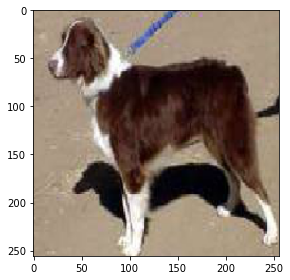

0.0


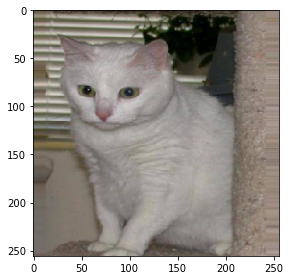

1.0


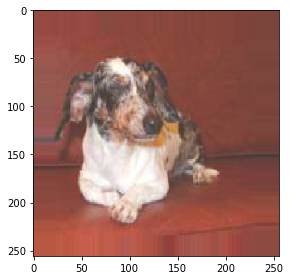

1.0


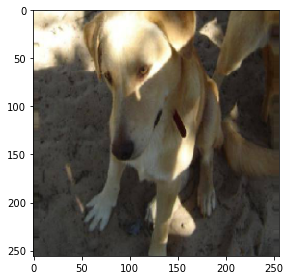

1.0


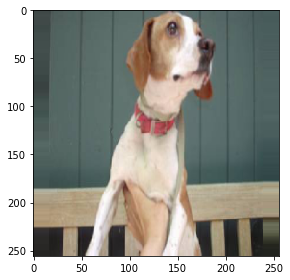

0.0


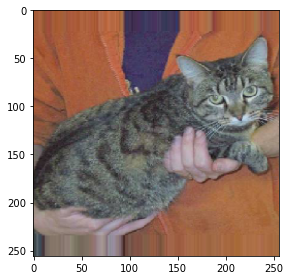

0.0


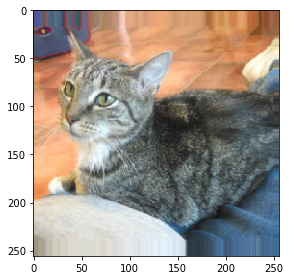

1.0


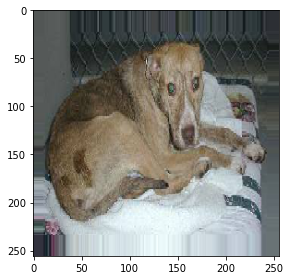

0.0


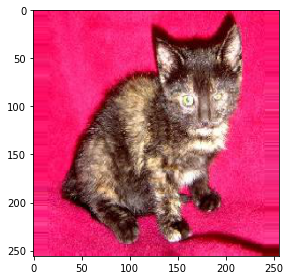

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
image_batch,label_batch = train_generator.next()

print(len(image_batch))
for i in range(0,len(image_batch)):
    image = image_batch[i]
    print(label_batch[i])
    imshow(image)

In [19]:
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 6303 images belonging to 2 classes.


In [20]:
#In fit_generator(), you don't pass the x and y directly, instead they come from a generator.
history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_samples,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_samples)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/25
120/120 [==============================] - 451s 4s/step - loss: 0.6858 - accuracy: 0.5298 - val_loss: 0.6661 - val_accuracy: 0.6008
Epoch 2/25
120/120 [==============================] - 473s 4s/step - loss: 0.6619 - accuracy: 0.6032 - val_loss: 0.6433 - val_accuracy: 0.6144
Epoch 3/25
120/120 [==============================] - 496s 4s/step - loss: 0.6485 - accuracy: 0.6073 - val_loss: 0.6213 - val_accuracy: 0.6600
Epoch 4/25
120/120 [==============================] - 530s 4s/step - loss: 0.6345 - accuracy: 0.6342 - val_loss: 0.6016 - val_accuracy: 0.6962
Epoch 5/25
120/120 [==============================] - 539s 4s/step - loss: 0.6052 - accuracy: 0.6790 - val_loss: 0.5776 - val_accuracy: 0.6984
Epoch 6/25
120/120 [==============================] - 561s 5s/step - loss: 0.5979 - accuracy: 0.6822 - val_loss: 0.5671 - val_accuracy: 0.7146
Epoch 7/25
120/120 [==============================] - 464s 4s/step

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


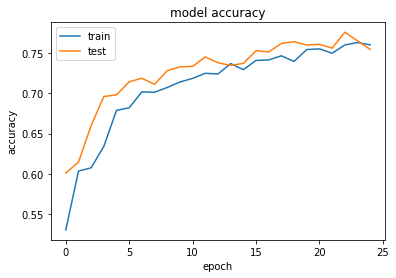

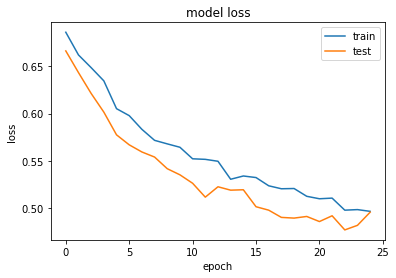

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

Prediction of Testing Data

In [32]:
model.save("model.h5")

In [22]:
test_figures = os.listdir(test_dir)
test_df = pd.DataFrame({
    'filename': test_figures
})

In [23]:
nb_samples = test_df.shape[0]
nb_samples

12500

In [24]:
test_df.head()

filename
0  8337.jpg
1  5637.jpg
2  9228.jpg
3  8976.jpg
4   982.jpg

In [25]:
test_generator = test_datagen.flow_from_dataframe(test_df,test_dir,x_col='filename', y_col = None,
    target_size=(img_width, img_height),
    batch_size=64,
    class_mode=None,
    shuffle= False)

Found 12500 validated image filenames.


In [26]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/64))
threshold = 0.6
test_df['category'] = np.where(predict > threshold, 1,0)

Instructions for updating:
Please use Model.predict, which supports generators.


In [27]:
test_df.head()

filename  category
0  8337.jpg         0
1  5637.jpg         0
2  9228.jpg         0
3  8976.jpg         1
4   982.jpg         1

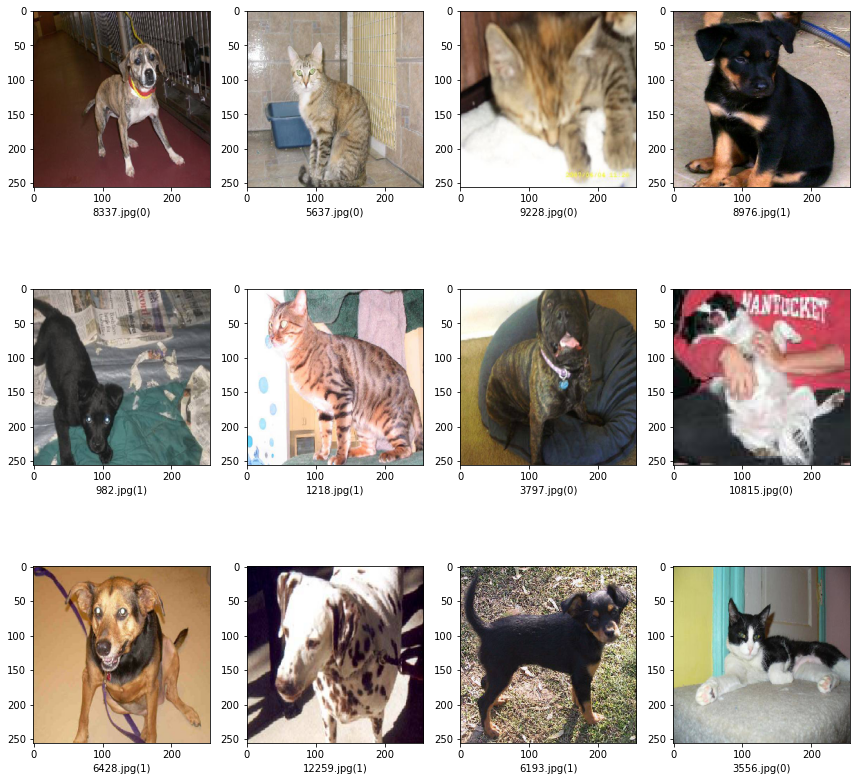

In [28]:
pyplot.figure(figsize=(12, 12))
for index, row in test_df.head(12).iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img(test_dir +'/'+ filename, target_size=(256, 256))
    pyplot.subplot(3, 4, index+1)
    pyplot.imshow(img)
    pyplot.xlabel(filename + '(' + "{}".format(category) + ')')
pyplot.tight_layout()
pyplot.show()

In [29]:
submission_df = test_df.copy()

submission_df['id'] = submission_df['filename'].str.split('.').str[0]

submission_df['label'] = submission_df['category']

submission_df.drop(['filename', 'category'], axis = 1 , inplace = True)

submission_df.to_csv('submission.csv', index = False)


Text(0.5, 1.0, '(Test data)')

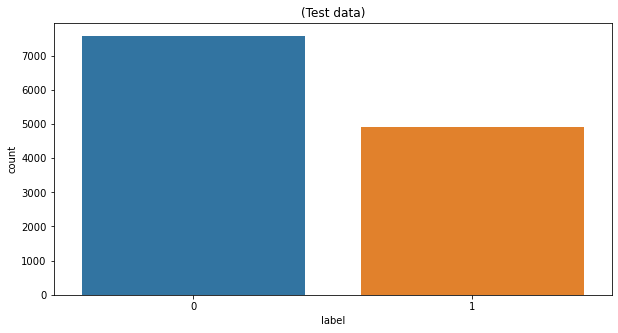

In [30]:
pyplot.figure(figsize=(10,5))
sns.countplot(submission_df['label'])
pyplot.title("(Test data)")

In [ ]:
def classify(image, model)

In [31]:
app = Flask(__name__)

@app.route('/')
def entry_page():
    #Jinja template of the webpage
    return render_template('index.html')

@app.route('/predict_object/', methods=['GET', 'POST'])
def render_message():
    #Loading CNN model
    saved_model = 'saved_models/tuned_model_fin.h5'
    model = load_model(saved_model)
    
    try:
        #Get image URL as input
        image_url = request.form['image_url']
        image = io.imread(image_url)
        
        #Apply same preprocessing used while training CNN model
        image_small = st.resize(image, (32,32,3))
        x = np.expand_dims(image_small.transpose(2, 0, 1), axis=0)
        
        #Call classify function to predict the image class using the loaded CNN model
        final,pred_class = classify(x, model)
        print(pred_class)
        print(final)
        
        #Store model prediction results to pass to the web page
        message = "Model prediction: {}".format(pred_class)
        print('Python module executed successfully')
        
    except Exception as e:
        #Store error to pass to the web page
        message = "Error encountered. Try another image. ErrorClass: {}, Argument: {} and Traceback details are: {}".format(e.__class__,e.args,e.__doc__)
        final = pd.DataFrame({'A': ['Error'], 'B': [0]})
        
    #Return the model results to the web page
    return render_template('index.html',
                            message=message,
                            data=final.round(decimals=2),
                            image_url=image_url)

NameError: name 'Flask' is not defined